In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [24]:
def generate_data(n):
    return np.array([np.random.choice([-1,1]) for _ in range(n*n)]).reshape(n,n)

In [25]:
def prob(energy, T):
    return np.exp(-energy/T)

In [26]:
def step(arr, n, T):
    energy = 0
    J = 1
    for i in range(n):
        i1 = (i-1)%n
        i2 = (i+1)%n
        for j in range(n):
            j1 = (j-1)%n
            j2 = (j+1)%n
            energy += J*arr[i][j]*(arr[i1][j]+arr[i2][j]+arr[i][j1]+arr[i][j2])
            dE = 2*J*arr[i][j]*(arr[i1][j]+arr[i2][j]+arr[i][j1]+arr[i][j2])
            if(dE<=0):
                arr[i][j]*=-1
            elif(dE>0 and prob(dE, T) > random.random()):
                arr[i][j]*=-1
    return energy/2, arr

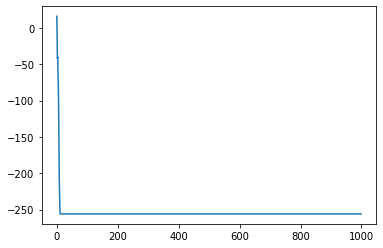

In [27]:
ar = generate_data(16)
en = []
mcs = []
mag = []
for i in range(1000):
    mag.append(sum(sum(ar)))
    energ, ar = step(ar, 16, 0.2)
    en.append(energ)
    mcs.append(i)
plt.plot(mcs, mag)

In [29]:
ar.reshape((1,16*16))

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

In [35]:
N = 16
temperatures = np.linspace(4.0, 0.2, 20)
mcs = [i for i in range(1, 30001)]
mag = []
data = generate_data(N)
for temp in temperatures:
    energies = np.zeros(1000*N*N).reshape((1000,N*N)).astype(int)
    j = 0
    m = 0
    for i in mcs:
        en, data = step(data, N, temp)
        if(i >= N*N and i % 20 == 0 and j < 1000):            
            energies[j] = data.reshape(1,256).astype(int)
            j += 1
        m = m + sum(sum(data))/(N*N)
    mag.append(m/len(mcs))
    for i in range(energies.shape[0]):
        for j in range(energies.shape[1]):
            if energies[i][j] == -1:
                energies[i][j] == 0
    #print(energies)
    np.savetxt(f'conf{round(temp,1)}.txt', energies.astype(int), delimiter=',')


(1000, 256)


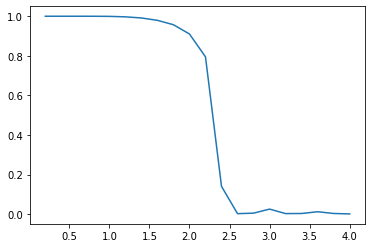

In [31]:
print(energies.shape)
plt.plot( temperatures, np.abs(mag))

In [108]:
np.zeros(1000*N*N).reshape((1000,N*N)).astype(int)
mag2 = np.abs(mag)

In [114]:
np.all([x < 0.1 for x in mag2])
[x < 0.1 for x in mag2]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]